In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import os

##**DATA UNDERSTANDING**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/DATA SI/IndianWeatherRepository.csv')
df.head(10)

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,...,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,...,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,...,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93
5,India,Sehore,Madhya Pradesh,23.20,77.08,Asia/Kolkata,1693286100,2023-08-29 10:45,25.9,78.6,...,7.9,10.5,1,1,06:03 AM,06:42 PM,05:42 PM,03:44 AM,Waxing Gibbous,93
6,India,Jabalpur,Madhya Pradesh,23.17,79.95,Asia/Kolkata,1693286100,2023-08-29 10:45,28.0,82.4,...,17.1,23.1,2,2,05:51 AM,06:31 PM,05:30 PM,03:32 AM,Waxing Gibbous,93
7,India,Narsimhapur,Madhya Pradesh,22.95,79.20,Asia/Kolkata,1693286100,2023-08-29 10:45,27.7,81.9,...,17.3,23.7,2,2,05:55 AM,06:34 PM,05:33 PM,03:36 AM,Waxing Gibbous,93
8,India,Panna,Madhya Pradesh,24.72,80.20,Asia/Kolkata,1693286100,2023-08-29 10:45,30.0,86.0,...,27.4,35.5,2,3,05:49 AM,06:31 PM,05:32 PM,03:27 AM,Waxing Gibbous,93
9,India,Ujjain,Madhya Pradesh,23.18,75.77,Asia/Kolkata,1693286100,2023-08-29 10:45,26.0,78.8,...,5.7,7.6,1,1,06:08 AM,06:48 PM,05:47 PM,03:49 AM,Waxing Gibbous,93


In [ ]:
df.shape

(32825, 42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32825 entries, 0 to 32824
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       32825 non-null  object 
 1   location_name                 32825 non-null  object 
 2   region                        32825 non-null  object 
 3   latitude                      32825 non-null  float64
 4   longitude                     32825 non-null  float64
 5   timezone                      32825 non-null  object 
 6   last_updated_epoch            32825 non-null  int64  
 7   last_updated                  32825 non-null  object 
 8   temperature_celsius           32825 non-null  float64
 9   temperature_fahrenheit        32825 non-null  float64
 10  condition_text                32825 non-null  object 
 11  wind_mph                      32825 non-null  float64
 12  wind_kph                      32825 non-null  float64
 13  w

In [ ]:
df.describe(include='number').round(2)

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,32825.00,32825.00,3.2825e+04,32825.00,32825.00,32825.00,32825.00,32825.00,32825.00,32825.00,...,32825.00,32825.00,32825.00,32825.00,32825.00,32825.00,32825.00,32825.00,32825.00,32825.00
mean,23.10,80.24,1.6958e+09,23.57,74.42,5.09,8.19,179.24,1007.83,29.76,...,14.57,659.00,27.26,10.62,4.75,62.46,76.42,2.70,5.32,48.20
std,5.80,5.76,1.4908e+06,4.27,7.69,3.05,4.89,106.42,4.19,0.12,...,8.01,581.29,23.76,10.91,11.06,70.24,83.16,1.39,3.72,35.47
min,8.08,68.97,1.6933e+09,-10.90,12.40,2.20,3.60,1.00,997.00,29.44,...,0.00,113.50,0.00,0.00,0.00,0.50,0.70,1.00,1.00,0.00
25%,20.27,76.07,1.6946e+09,22.00,71.60,2.70,4.30,79.00,1005.00,29.67,...,8.60,317.10,9.10,3.70,1.00,14.50,19.20,1.00,2.00,13.00
50%,23.95,78.69,1.6958e+09,24.10,75.40,4.30,6.80,199.00,1007.00,29.74,...,13.60,500.70,21.80,7.40,2.30,40.00,51.20,2.00,4.00,46.00
75%,26.77,83.90,1.6971e+09,26.00,78.80,6.30,10.10,270.00,1011.00,29.85,...,18.90,801.10,39.30,13.70,4.80,86.00,105.40,4.00,10.00,84.00
max,34.57,95.80,1.6984e+09,38.30,100.90,26.80,43.20,360.00,1029.00,30.38,...,75.60,13565.10,234.60,189.20,541.70,1374.80,1498.00,6.00,10.00,100.00


In [ ]:
df.describe(include='object')

,country,location_name,region,timezone,last_updated,condition_text,wind_direction,sunrise,sunset,moonrise,moonset,moon_phase
count,32825,32825,32825,32825,32825,32825,32825,32825,32825,32825,32825,32825
unique,1,543,33,3,239,29,16,132,167,1441,1441,8
top,India,Udaipur,Uttar Pradesh,Asia/Kolkata,2023-10-14 02:30,Clear,W,06:07 AM,06:08 PM,No moonrise,No moonset,Waxing Crescent
freq,32825,116,3664,32645,542,13762,3368,808,508,1097,1091,7671


#**EDA**

<ipython-input-69-d66ce7daf5b4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


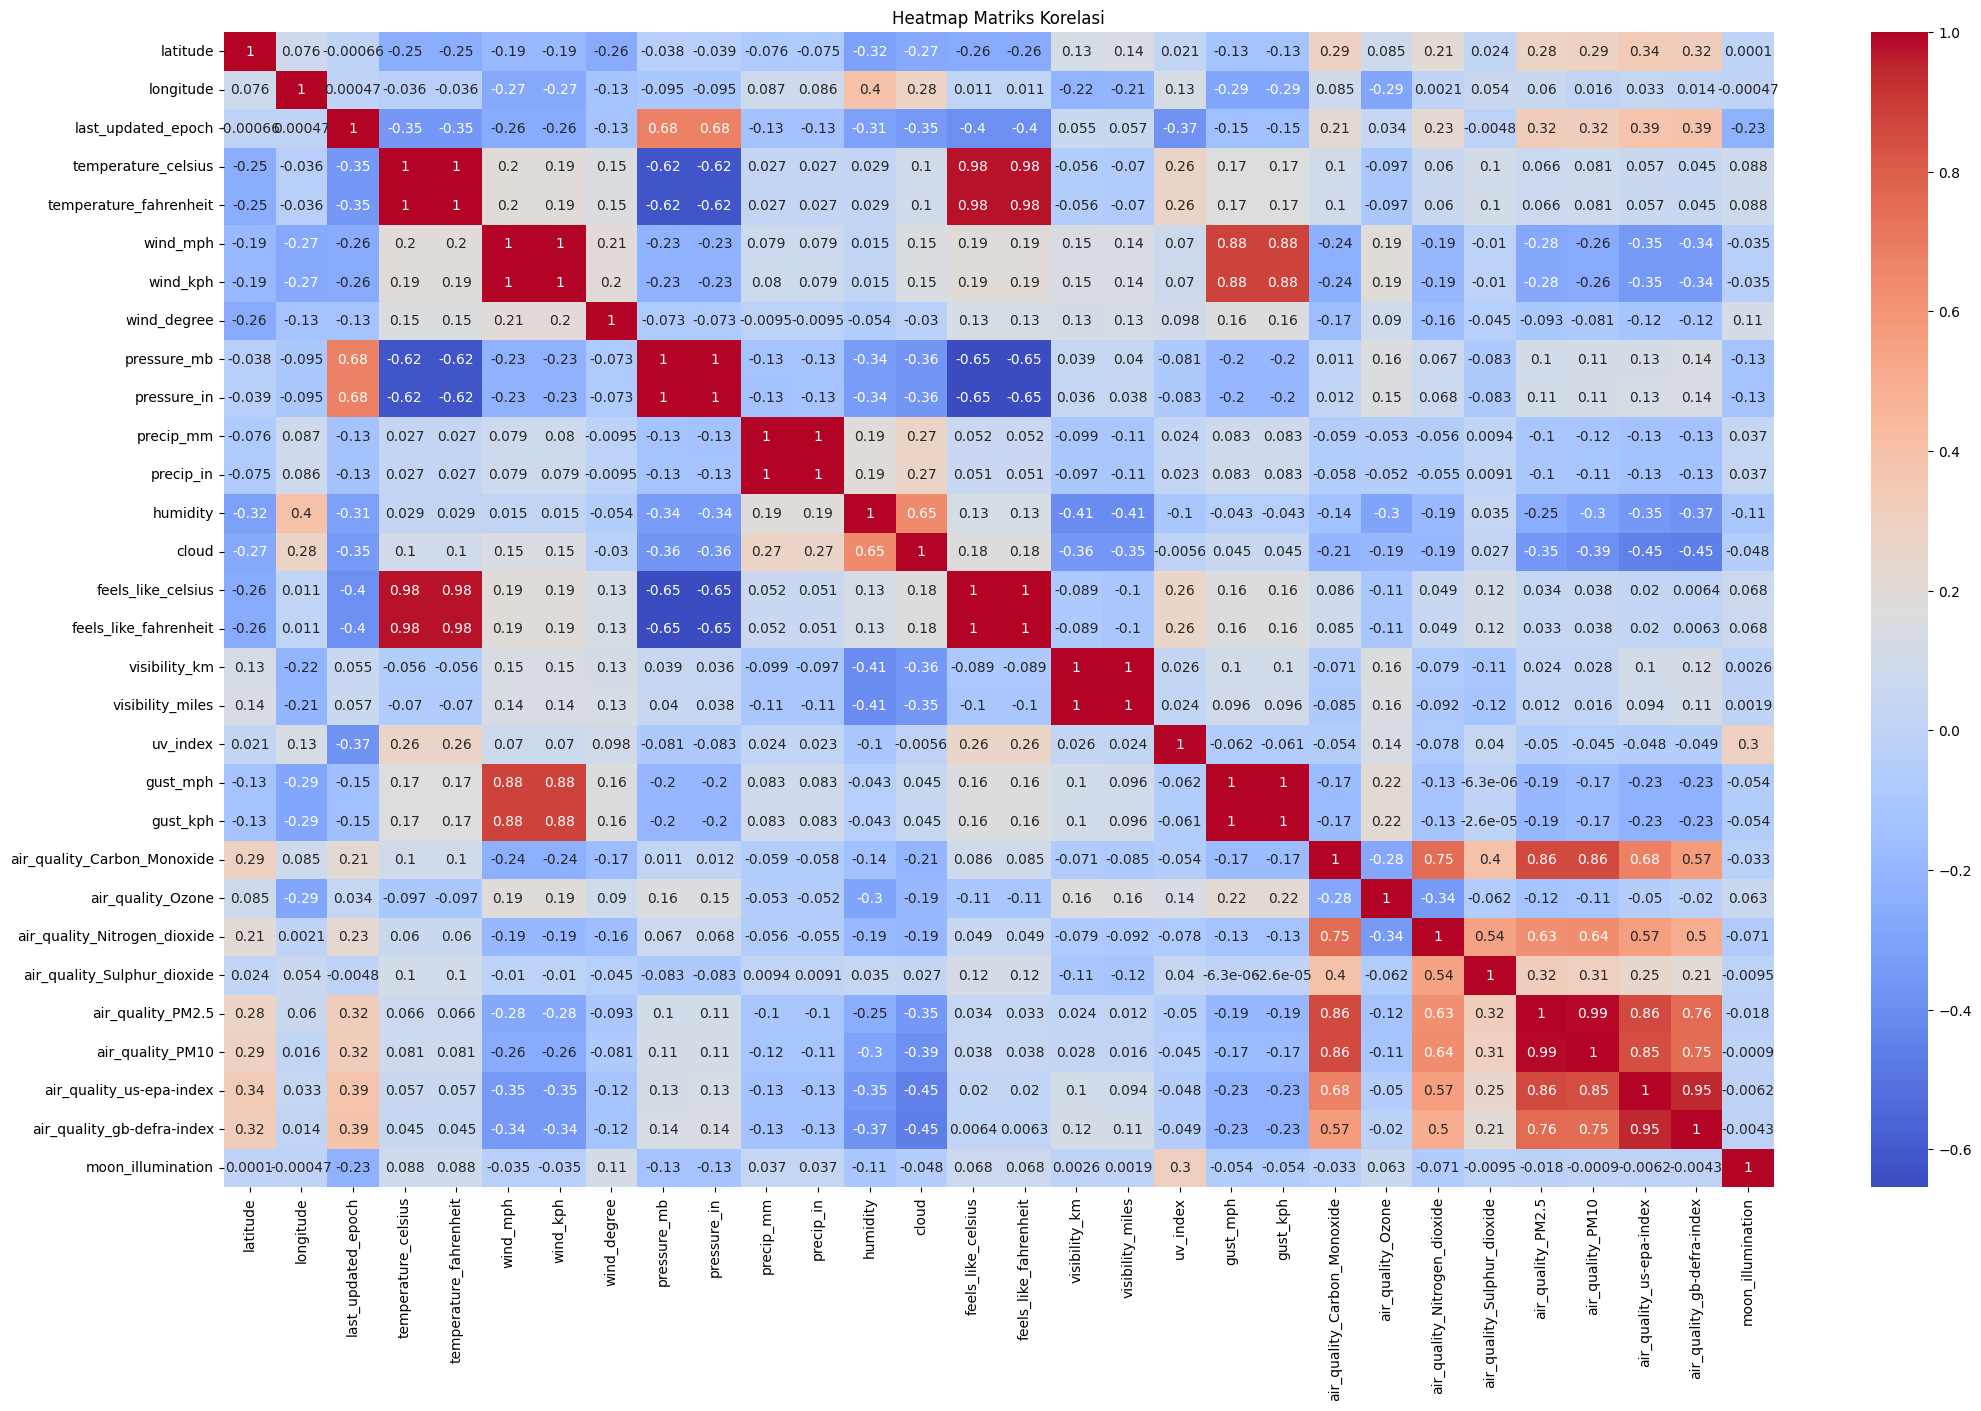

In [ ]:
#Membuat matriks korelasi
correlation_matrix = df.corr()

#Membuat heatmap
plt.figure(figsize=(25,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Matriks Korelasi')
plt.show()

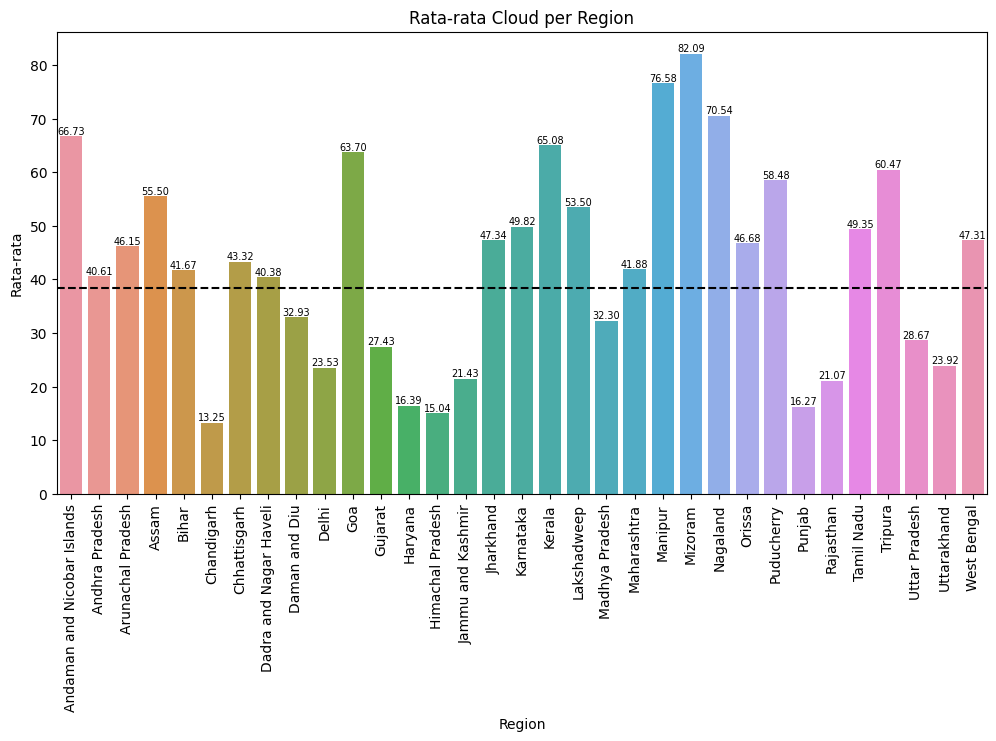

In [ ]:
# Menghitung rata-rata cloud dari seluruh data
overall_average_cloud = df['cloud'].mean()

# Melakukan aggregasi untuk mendapatkan rata-rata cloud per region
average_cloud_by_region = df.groupby('region')['cloud'].mean().reset_index()

# Menampilkan distribusi rata-rata cloud per region
plt.figure(figsize=(12,6))
ax = sns.barplot(x='region', y='cloud', data=average_cloud_by_region)

# Menambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=7)

plt.axhline(overall_average_cloud, color='black', linestyle='--', label='Rata-rata Seluruh Data')  # Menambahkan garis horizontal
plt.title('Rata-rata Cloud per Region')
plt.xlabel('Region')
plt.ylabel('Rata-rata')

# Mengatur rotasi label pada sumbu x menjadi vertikal
plt.xticks(rotation=90)

plt.show()

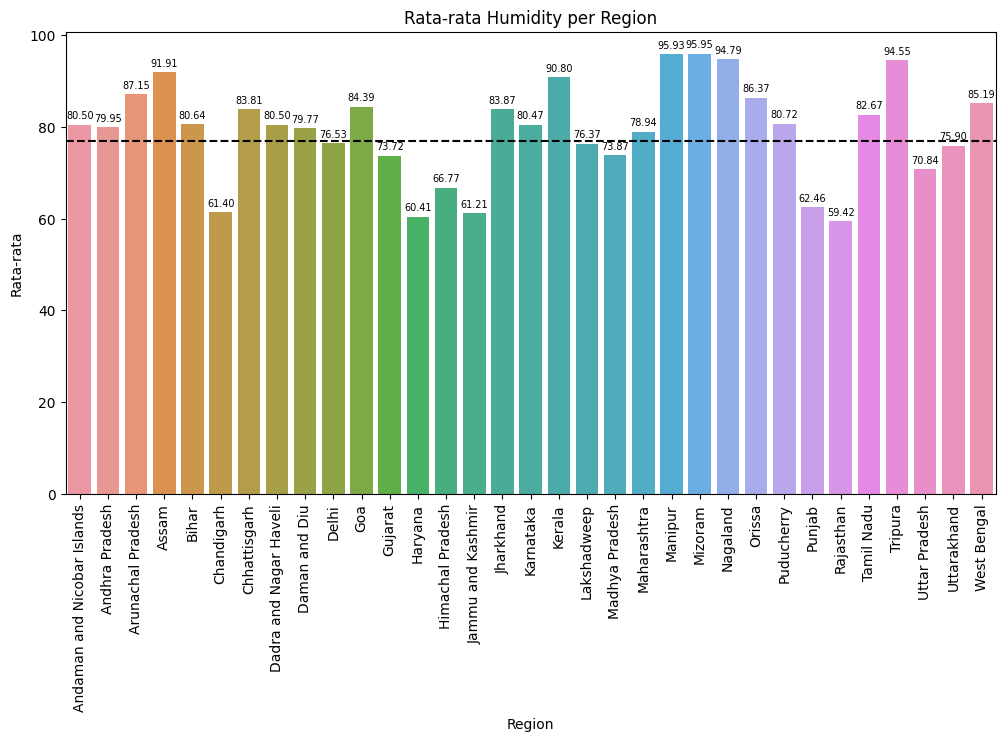

In [ ]:
# Menghitung rata-rata humidity dari seluruh data
overall_average_humidity = df['humidity'].mean()

# Melakukan aggregasi untuk mendapatkan rata-rata humidity per region
average_humidity_by_region = df.groupby('region')['humidity'].mean().reset_index()

# Menampilkan distribusi rata-rata humidity per region
plt.figure(figsize=(12,6))
ax = sns.barplot(x='region', y='humidity', data=average_humidity_by_region)

# Menambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()+0.85),
                ha='center', va='bottom', fontsize=7)

plt.axhline(overall_average_humidity, color='black', linestyle='--', label='Rata-rata Seluruh Data')  # Menambahkan garis horizontal
plt.title('Rata-rata Humidity per Region')
plt.xlabel('Region')
plt.ylabel('Rata-rata')

# Mengatur rotasi label pada sumbu x menjadi vertikal
plt.xticks(rotation=90)

plt.show()

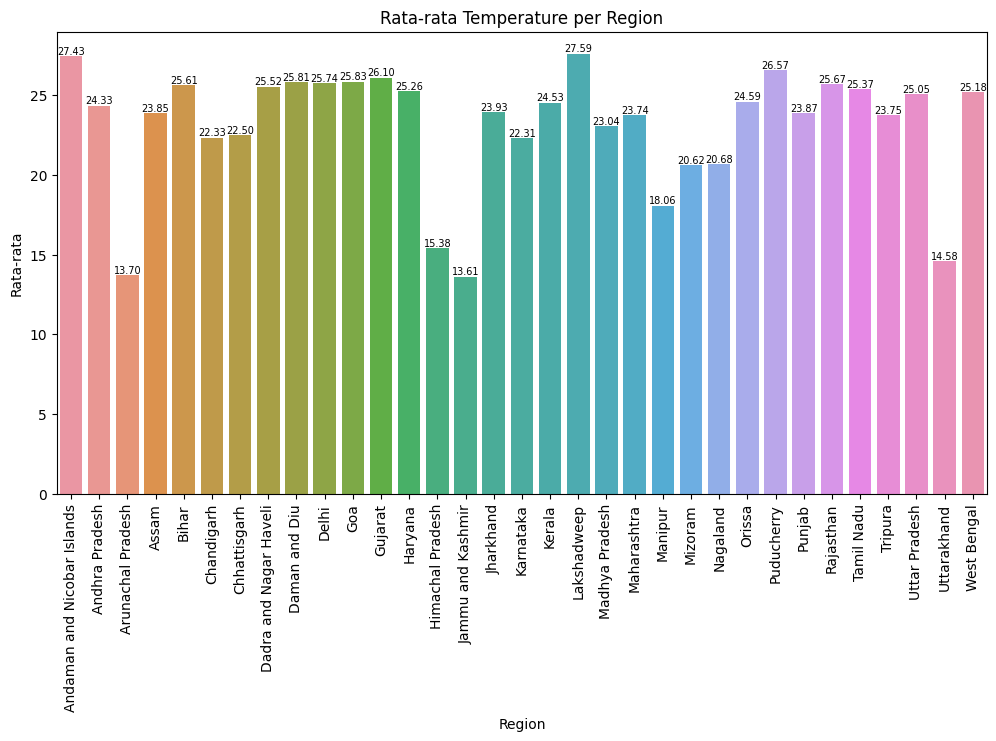

In [ ]:
# Menghitung rata-rata humidity dari seluruh data
overall_average_temperature = df['temperature_celsius'].mean()

# Melakukan aggregasi untuk mendapatkan rata-rata humidity per region
average_temperature_by_region = df.groupby('region')['temperature_celsius'].mean().reset_index()

# Menampilkan distribusi rata-rata humidity per region
plt.figure(figsize=(12,6))
ax = sns.barplot(x='region', y='temperature_celsius', data=average_temperature_by_region)

# Menambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=7)

plt.title('Rata-rata Temperature per Region')
plt.xlabel('Region')
plt.ylabel('Rata-rata')

# Mengatur rotasi label pada sumbu x menjadi vertikal
plt.xticks(rotation=90)

plt.show()

In [ ]:
# Mencari rata-rata nilai numerik berdasarkan condition_text
average_values_by_condition = df.groupby('condition_text')[['temperature_celsius', 'gust_kph', 'wind_kph', 'uv_index', 'cloud', 'humidity']].mean().reset_index()

# Menampilkan rata-rata nilai numerik untuk setiap kondisi cuaca
average_values_by_condition

,condition_text,temperature_celsius,gust_kph,wind_kph,uv_index,cloud,humidity
0,Clear,22.4357,14.3225,7.5484,1.0000,8.0249,64.6788
1,Cloudy,24.1398,18.6440,12.1602,1.3320,73.7760,86.1367
2,Fog,20.6881,7.3837,4.8351,1.1108,99.6305,98.1736
3,Heavy rain,22.5596,26.2234,16.5043,1.3404,97.8723,97.5106
4,Heavy rain at times,24.7000,15.1750,9.6250,1.0000,68.2500,89.7500
5,Light drizzle,22.5891,16.4294,11.2134,1.0000,91.4202,94.4790
6,Light freezing rain,-1.2556,9.1444,6.5889,1.0000,76.7778,57.6667
7,Light rain,23.9466,17.3340,10.3623,1.0560,90.6940,95.2313
8,Light rain shower,23.9310,16.0530,9.5664,1.1403,78.8425,92.6010
9,Light sleet,5.2500,1.1500,3.6000,1.0000,84.5000,97.0000


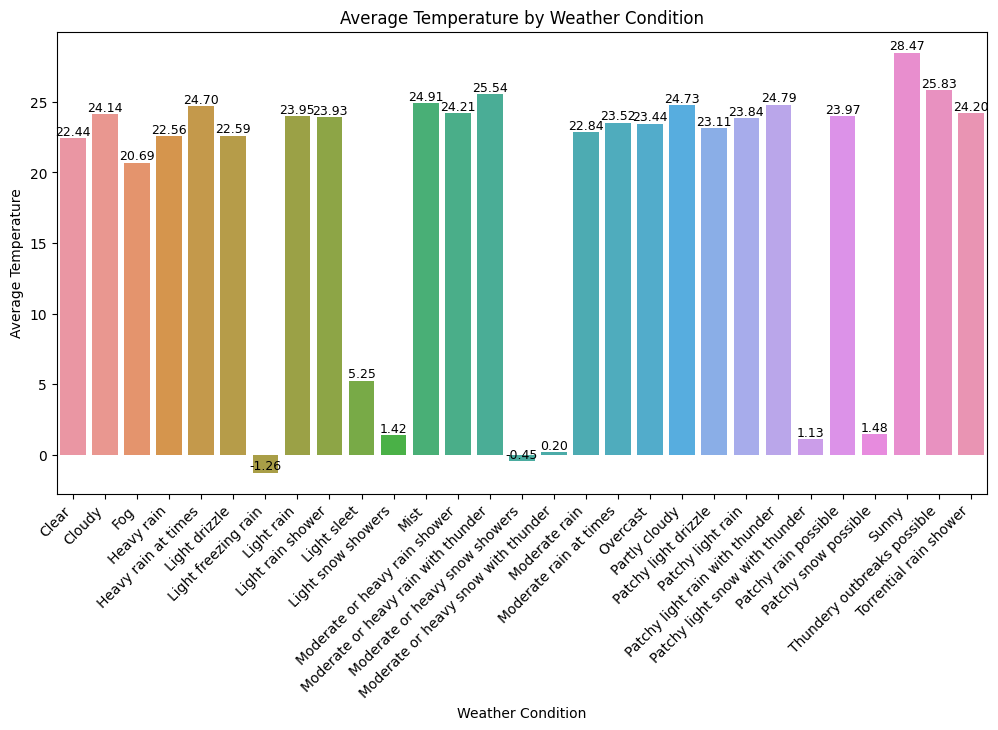

In [ ]:
# Mencari rata-rata nilai numerik berdasarkan condition_text
average_values_by_condition = df.groupby('condition_text')[['temperature_celsius', 'gust_kph', 'wind_kph', 'uv_index', 'cloud', 'humidity']].mean().reset_index()

# Menampilkan bar plot rata-rata nilai numerik untuk setiap kondisi cuaca
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='condition_text', y='temperature_celsius', data=average_values_by_condition)
plt.title('Average Temperature by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45, ha='right')

# Menambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.show()

#**DATA PREPROCESSING**

##**Data Cleaning**

**Feature Selection**

In [ ]:
#Drop kolom yang tidak dibutuhkan
col_drop = ['country','latitude','longitude','last_updated_epoch','timezone', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_illumination','air_quality_Carbon_Monoxide'
,'air_quality_Ozone','air_quality_Nitrogen_dioxide','air_quality_PM10','moonrise','moonset','moon_phase','wind_direction','wind_degree','precip_mm','precip_in','temperature_fahrenheit','feels_like_fahrenheit',
'wind_mph','pressure_in','visibility_miles','gust_mph', 'air_quality_Sulphur_dioxide','air_quality_PM2.5','last_updated','air_quality_gb-defra-index','uv_index'
]
df = df.drop(col_drop, axis=1)
df.head(50)

,location_name,region,temperature_celsius,condition_text,wind_kph,pressure_mb,humidity,cloud,feels_like_celsius,visibility_km,gust_kph,air_quality_us-epa-index
0,Ashoknagar,Madhya Pradesh,27.5,Partly cloudy,20.5,1008.0,67,26,29.7,10.0,23.8,1
1,Raisen,Madhya Pradesh,27.5,Sunny,15.5,1008.0,70,19,30.0,10.0,18.0,1
2,Chhindwara,Madhya Pradesh,26.3,Partly cloudy,18.4,1009.0,70,51,28.2,10.0,21.2,2
3,Betul,Madhya Pradesh,25.6,Cloudy,16.9,1009.0,76,65,27.6,10.0,20.9,1
4,Hoshangabad,Madhya Pradesh,27.2,Cloudy,16.2,1009.0,74,82,29.9,10.0,18.7,1
5,Sehore,Madhya Pradesh,25.9,Cloudy,15.8,1009.0,77,68,28.1,10.0,18.4,1
6,Jabalpur,Madhya Pradesh,28.0,Mist,15.1,1010.0,70,50,31.0,5.0,22.3,2
7,Narsimhapur,Madhya Pradesh,27.7,Sunny,17.6,1008.0,71,21,30.5,10.0,20.2,2
8,Panna,Madhya Pradesh,30.0,Sunny,18.7,1007.0,60,22,33.1,10.0,21.6,2
9,Ujjain,Madhya Pradesh,26.0,Mist,19.1,1012.0,74,50,27.8,5.0,22.7,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32825 entries, 0 to 32824
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   location_name             32825 non-null  object 
 1   region                    32825 non-null  object 
 2   temperature_celsius       32825 non-null  float64
 3   condition_text            32825 non-null  object 
 4   wind_kph                  32825 non-null  float64
 5   pressure_mb               32825 non-null  float64
 6   humidity                  32825 non-null  int64  
 7   cloud                     32825 non-null  int64  
 8   feels_like_celsius        32825 non-null  float64
 9   visibility_km             32825 non-null  float64
 10  gust_kph                  32825 non-null  float64
 11  air_quality_us-epa-index  32825 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 3.0+ MB


**Handling Missing Value**

In [ ]:
#Pengecekan missing value
df.isnull().sum()

location_name               0
region                      0
temperature_celsius         0
condition_text              0
wind_kph                    0
pressure_mb                 0
humidity                    0
cloud                       0
feels_like_celsius          0
visibility_km               0
gust_kph                    0
air_quality_us-epa-index    0
dtype: int64

**Handling Noisy Data**

In [ ]:
#Membuat Interquartile Range
def find_outliers_tukey(x):
  Q1 = x.quantile(.25)
  Q3 = x.quantile(.75)
  IQR = Q3 - Q1
  floor = Q1 - 1.5*IQR
  ceiling = Q3 + 1.5*IQR
  outlier_indices = list(x.index[(x<floor)|(x>ceiling)])
  outlier_values = list(x[outlier_indices])
  return outlier_indices, outlier_values

In [ ]:
#temperature_celsius outliers
tc_indices, tc_values = find_outliers_tukey(df['temperature_celsius'])
print('Outliers for temperature celsius')
print(np.sort(tc_values))

#wind_kph outliers
wk_indices, wk_values = find_outliers_tukey(df['wind_kph'])
print('Outliers for wind in kph')
print(np.sort(wk_values))

#pressure_mb outliers
pm_indices, pm_values = find_outliers_tukey(df['pressure_mb'])
print('Outliers for pressure in mb')
print(np.sort(pm_values))

#humidity outliers
hm_indices, hm_values = find_outliers_tukey(df['humidity'])
print('Outliers for humidity')
print(np.sort(hm_values))

#cloud outliers
cl_indices, cl_values = find_outliers_tukey(df['cloud'])
print('Outliers for cloud')
print(np.sort(cl_values))

#feels_like_celsius outliers
flc_indices, flc_values = find_outliers_tukey(df['feels_like_celsius'])
print('Outliers for feels_like_celsius ')
print(np.sort(flc_values))

#visibility_km outliers
vk_indices, vk_values = find_outliers_tukey(df['visibility_km'])
print('Outliers for visibility_km ')
print(np.sort(vk_values))

#gust_kph outliers
gk_indices, gk_values = find_outliers_tukey(df['gust_kph'])
print('Outliers for gust_kph')
print(np.sort(gk_values))

#air_quality_us-epa-index outlier
epa_indices, epa_values = find_outliers_tukey(df['air_quality_us-epa-index'])
print('Outliers for air_quality_us-epa-index')
print(np.sort(epa_values))

Outliers for temperature celsius
[-10.9 -10.3 -10.2 ...  36.3  36.3  38.3]
Outliers for wind in kph
[19.1 19.1 19.1 ... 40.7 41.4 43.2]
Outliers for pressure in mb
[1021. 1021. 1021. 1021. 1021. 1021. 1021. 1021. 1021. 1021. 1021. 1021.
 1021. 1021. 1021. 1021. 1021. 1021. 1021. 1021. 1021. 1021. 1021. 1021.
 1021. 1021. 1021. 1021. 1021. 1021. 1021. 1021. 1021. 1021. 1021. 1021.
 1021. 1021. 1021. 1021. 1021. 1021. 1021. 1021. 1021. 1021. 1021. 1021.
 1021. 1021. 1021. 1021. 1021. 1021. 1021. 1021. 1022. 1022. 1022. 1022.
 1022. 1022. 1022. 1022. 1022. 1022. 1022. 1022. 1022. 1022. 1022. 1022.
 1022. 1022. 1022. 1022. 1022. 1022. 1022. 1022. 1022. 1022. 1022. 1022.
 1022. 1022. 1022. 1022. 1022. 1022. 1023. 1023. 1023. 1023. 1023. 1023.
 1023. 1023. 1023. 1023. 1023. 1023. 1023. 1023. 1023. 1023. 1023. 1023.
 1023. 1023. 1023. 1023. 1024. 1024. 1024. 1024. 1024. 1024. 1024. 1024.
 1024. 1024. 1024. 1024. 1024. 1024. 1024. 1024. 1024. 1024. 1024. 1024.
 1024. 1024. 1024. 1024. 1024. 10

In [ ]:
df=df.drop(tc_indices, axis=0, errors='ignore')
df=df.drop(wk_indices, axis=0, errors='ignore')
df=df.drop(pm_indices, axis=0, errors='ignore')
df=df.drop(hm_indices, axis=0, errors='ignore')
df=df.drop(cl_indices, axis=0, errors='ignore')
df=df.drop(flc_indices, axis=0, errors='ignore')
df=df.drop(vk_indices, axis=0, errors='ignore')
df=df.drop(gk_indices, axis=0, errors='ignore')
df=df.drop(epa_indices, axis=0, errors='ignore')

##**Data Transformation**

**Data Manipulation**

In [ ]:
#Memeriksa data unique pada kolom 'condition_text'
df['condition_text'].unique()

array(['Sunny', 'Partly cloudy', 'Cloudy', 'Patchy rain possible',
       'Overcast', 'Patchy light rain with thunder', 'Light rain shower',
       'Clear', 'Thundery outbreaks possible', 'Patchy light rain',
       'Moderate rain at times', 'Light rain', 'Mist'], dtype=object)

In [ ]:
#Membuat dictionary mapping
weather_mapping = {
    'Partly cloudy': 'No Rain',
    'Sunny': 'No Rain',
    'Cloudy': 'No Rain',
    'Mist': 'No Rain',
    'Overcast':'No Rain',
    'Clear':'No Rain',
    'Fog':'No Rain',
    'Light rain':'Rain',
    'Torrential rain shower':'Rain',
    'Thundery outbreaks possible':'Rain',
    'Patchy light drizzle':'Rain',
    'Patchy light rain':'Rain',
    'Moderate rain':'Rain',
    'Light rain shower':'Rain',
    'Moderate rain at times':'Rain',
    'Heavy rain':'Rain',
    'Heavy rain at times':'Rain',
    'Light drizzle':'Rain',
    'Moderate or heavy rain with thunder':'Rain',
    'Patchy snow possible':'Rain',
    'Moderate or heavy snow showers':'Rain',
    'Light snow showers':'Rain',
    'Moderate or heavy snow with thunder':'Rain',
    'Patchy light snow with thunder':'Rain',
    'Light sleet':'Rain',
    'Light freezing rain':'Rain',
    'Patchy rain possible': 'Rain',
    'Moderate or heavy rain shower': 'Rain',
    'Patchy light rain with thunder': 'Rain'
}

# Menggunakan metode map untuk mentransformasi kolom 'Weather'
df['rain_status'] = df['condition_text'].map(weather_mapping)

# Menambahkan kolom baru 'Rain Indicator' dengan nilai 0 untuk 'No Rain' dan 1 untuk 'Rain'
df['rain_indicator'] = df['rain_status'].map({'No Rain': 0, 'Rain': 1})

# Menampilkan DataFrame hasil transformasi
df.head(50)

,location_name,region,temperature_celsius,condition_text,wind_kph,pressure_mb,humidity,cloud,feels_like_celsius,visibility_km,gust_kph,air_quality_us-epa-index,rain_status,rain_indicator
1,Raisen,Madhya Pradesh,27.5,Sunny,15.5,1008.0,70,19,30.0,10.0,18.0,1,No Rain,0
2,Chhindwara,Madhya Pradesh,26.3,Partly cloudy,18.4,1009.0,70,51,28.2,10.0,21.2,2,No Rain,0
3,Betul,Madhya Pradesh,25.6,Cloudy,16.9,1009.0,76,65,27.6,10.0,20.9,1,No Rain,0
4,Hoshangabad,Madhya Pradesh,27.2,Cloudy,16.2,1009.0,74,82,29.9,10.0,18.7,1,No Rain,0
5,Sehore,Madhya Pradesh,25.9,Cloudy,15.8,1009.0,77,68,28.1,10.0,18.4,1,No Rain,0
7,Narsimhapur,Madhya Pradesh,27.7,Sunny,17.6,1008.0,71,21,30.5,10.0,20.2,2,No Rain,0
8,Panna,Madhya Pradesh,30.0,Sunny,18.7,1007.0,60,22,33.1,10.0,21.6,2,No Rain,0
10,Rewa,Madhya Pradesh,30.6,Partly cloudy,15.8,1006.0,57,58,33.5,10.0,18.4,2,No Rain,0
11,Dindori,Madhya Pradesh,30.3,Patchy rain possible,8.6,1008.0,55,70,32.9,10.0,10.4,1,Rain,1
12,Balaghat,Madhya Pradesh,28.3,Partly cloudy,10.8,1008.0,67,29,31.1,10.0,12.6,2,No Rain,0


**Handling Imbalance Data**

In [ ]:
#Memeriksa balance vs imbalance data
balance = df['rain_status'].value_counts()
balance

No Rain    17486
Rain        5140
Name: rain_status, dtype: int64

In [ ]:
rain_indicator_0, rain_indicator_1 = df.rain_indicator.value_counts()

df_ri_0 = df[df['rain_indicator']==0]
df_ri_1 = df[df['rain_indicator']==1]

In [ ]:
df_ri_1_over = df_ri_1.sample(rain_indicator_0, replace=True)

df = pd.concat([df_ri_0, df_ri_1_over],axis=0)
print('After Random Over-Sampling')
print(df.rain_indicator.value_counts())

After Random Over-Sampling
0    17486
1    17486
Name: rain_indicator, dtype: int64


In [ ]:
df.to_excel('dataframe.xlsx', index=False)

##**Data Normalization**

In [ ]:
# Data manipulation
from seaborn import load_dataset
import numpy as np
import pandas as pd
pd.options.display.precision = 4
pd.options.mode.chained_assignment = None

# Machine learning pipeline
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn import set_config
set_config(display="diagram")


In [ ]:
SEED = 42
TARGET = 'rain_indicator'
FEATURES = df.columns.drop(TARGET)

NUMERICAL = df[FEATURES].select_dtypes('number').columns
print(f"Numerical features: {', '.join(NUMERICAL)}")

CATEGORICAL = pd.Index(np.setdiff1d(FEATURES, NUMERICAL))
print(f"Categorical features: {', '.join(CATEGORICAL)}")

Numerical features: temperature_celsius, wind_kph, pressure_mb, humidity, cloud, feels_like_celsius, visibility_km, gust_kph, air_quality_us-epa-index
Categorical features: condition_text, location_name, rain_status, region


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=TARGET), df[TARGET],
                                                    test_size=.2, random_state=SEED,
                                                    stratify=df[TARGET])
num_imputer = SimpleImputer(strategy='mean')
train_num_imputed = num_imputer.fit_transform(X_train[NUMERICAL])

scaler = MinMaxScaler()
train_num_scaled = scaler.fit_transform(train_num_imputed)

cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
train_cat_imputed = cat_imputer.fit_transform(X_train[CATEGORICAL])

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
train_cat_encoded = encoder.fit_transform(train_cat_imputed)

train_preprocessed = np.concatenate((train_num_scaled, train_cat_encoded), axis=1)

columns = np.append(NUMERICAL, encoder.get_feature_names_out(CATEGORICAL))
pd.DataFrame(train_preprocessed, columns=columns, index=X_train.index).head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,temperature_celsius,wind_kph,pressure_mb,humidity,cloud,feels_like_celsius,visibility_km,gust_kph,air_quality_us-epa-index,condition_text_Cloudy,...,region_Nagaland,region_Orissa,region_Puducherry,region_Punjab,region_Rajasthan,region_Tamil Nadu,region_Tripura,region_Uttar Pradesh,region_Uttarakhand,region_West Bengal
17845,0.2812,0.5497,0.55,0.8732,1.00,0.2228,1.0,0.5423,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18162,0.7625,0.2384,0.40,0.5352,0.16,0.7327,1.0,0.3644,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5029,0.6062,0.3576,0.30,0.8028,0.70,0.6287,1.0,0.5452,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12114,0.5938,0.6887,0.40,0.8592,0.63,0.6287,1.0,0.6443,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19395,0.4250,0.7616,0.35,0.9577,1.00,0.4604,1.0,0.6560,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_num_imputed = num_imputer.transform(X_test[NUMERICAL])
test_num_scaled = scaler.transform(test_num_imputed)
test_cat_imputed = cat_imputer.transform(X_test[CATEGORICAL])
test_cat_encoded = encoder.transform(test_cat_imputed)
test_preprocessed = np.concatenate((test_num_scaled, test_cat_encoded), axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
])

preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, NUMERICAL),
    ('cat', categorical_pipe, CATEGORICAL)
])

pipe = Pipeline([
    ('preprocessors', preprocessors),
    ('model', DecisionTreeClassifier())
])

pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['temperature_celsius', 'wind_kph', 'pressure_mb', 'humidity', 'cloud',
       'feels_like_celsius', 'visibility_km', 'gust_kph',
       'air_quality_us-epa-index'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['condition_text', 'location_name', 'rain_status', 'region'], dtype='object'))])),
                ('model', DecisionTreeClassifier())])

In [ ]:
def calculate_roc_auc(model_pipe, X, y):
    """Calculate roc auc score.

    Parameters:
    ===========
    model_pipe: sklearn model or pipeline
    X: features
    y: true target
    """
    y_proba = model_pipe.predict_proba(X)[:,1]
    return roc_auc_score(y, y_proba)

print(f"Train ROC-AUC: {calculate_roc_auc(pipe, X_train, y_train):.4f}")
print(f"Test ROC-AUC: {calculate_roc_auc(pipe, X_test, y_test):.4f}")

Train ROC-AUC: 1.0000
Test ROC-AUC: 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


#**DATA MODELLING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan Label Encoding pada kolom kategorikal
df['location_name_encoded'] = label_encoder.fit_transform(df['location_name'])
df['region_encoded'] = label_encoder.fit_transform(df['region'])

In [ ]:
x = df.drop('rain_indicator', axis=1) # menghapus kolom outcome
y = df['rain_indicator'] # hanya menampilkan kolom outcome sebagai label

In [ ]:
# Encode categorical variables if necessary
# If your dataset contains categorical variables, you may need to encode them.
# For simplicity, let's assume all features are numeric.

# penentuan nama variabel yang akan dijadikan data training dan testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) # test_size:untuk mengambil sebagian data buat ditest
x_test                                                                                     # random_state:angka random agar pengambilan data tidak berubah

,location_name,region,temperature_celsius,condition_text,wind_kph,pressure_mb,humidity,cloud,feels_like_celsius,visibility_km,gust_kph,air_quality_us-epa-index,rain_status,location_name_encoded,region_encoded
26752,Kanniyakumari,Tamil Nadu,23.9,Patchy rain possible,6.8,1010.0,86,89,26.0,10.0,12.2,2,Rain,239,28
16212,Latur,Maharashtra,22.6,Patchy rain possible,11.5,1007.0,89,59,24.9,10.0,22.6,1,Rain,286,20
10263,Thiruvarur,Tamil Nadu,26.7,Clear,16.6,1008.0,82,24,29.9,10.0,24.8,1,No Rain,473,28
12128,Valsad,Gujarat,24.8,Patchy rain possible,15.5,1005.0,94,71,27.7,10.0,25.2,1,Rain,495,11
20680,Sambhal,Uttar Pradesh,22.6,Clear,4.3,1007.0,76,0,24.8,10.0,9.1,6,No Rain,417,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17095,Dumka,Jharkhand,26.4,Clear,7.2,1004.0,81,11,29.4,10.0,14.4,4,No Rain,142,15
4469,Surat,Gujarat,26.6,Clear,13.3,1005.0,82,13,29.6,10.0,22.0,1,No Rain,464,11
14741,Nalgonda,Andhra Pradesh,25.8,Patchy rain possible,4.7,1007.0,85,59,28.6,10.0,8.6,1,Rain,339,1
754,Puducherry,Puducherry,29.1,Sunny,12.6,1008.0,68,19,32.8,10.0,16.2,1,No Rain,376,25


In [ ]:
y

1        0
2        0
3        0
4        0
5        0
        ..
6151     1
5612     1
7122     1
12330    1
31179    1
Name: rain_indicator, Length: 34972, dtype: int64

In [ ]:
# Menghapus kolom x_test yang termasuk categorical
x_test = x_test.drop(['location_name', 'region', 'condition_text', 'rain_status'], axis=1)

In [ ]:
# Menghapus kolom x_train yang termasuk categorical
x_train = x_train.drop(['location_name', 'region', 'condition_text', 'rain_status'], axis=1)

In [ ]:
x_train

,temperature_celsius,wind_kph,pressure_mb,humidity,cloud,feels_like_celsius,visibility_km,gust_kph,air_quality_us-epa-index,location_name_encoded,region_encoded
9216,29.4,12.6,1002.0,79,45,35.4,10.0,24.5,4,220,30
29897,21.1,7.6,1014.0,58,14,21.1,10.0,15.9,4,195,20
17180,20.6,3.6,1006.0,90,80,20.6,10.0,7.6,1,287,22
30444,25.1,7.9,1013.0,43,24,25.6,10.0,16.6,4,134,20
6839,25.4,13.0,1009.0,85,78,28.1,9.0,22.0,1,270,17
...,...,...,...,...,...,...,...,...,...,...,...
31895,21.9,7.9,1012.0,63,6,21.9,10.0,16.3,5,283,4
14560,19.7,15.1,1012.0,95,100,19.7,10.0,21.8,1,192,16
24004,25.4,9.0,1008.0,54,5,26.3,10.0,18.9,3,385,30
1651,27.0,11.9,1006.0,66,41,28.8,10.0,22.0,2,362,19


**Algoritma Decission Tree**

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)

In [ ]:
actual = y_test  # Actual target values
# Create confusion matrices
dt_cm = confusion_matrix(actual, dt_pred)

In [ ]:
# Convert confusion matrices to DataFrames
def confusion_matrix_to_dataframe(cm):
    labels = sorted(set(actual))
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    return df_cm

# Convert confusion matrices to DataFrames with labels
dt_cm_df = confusion_matrix_to_dataframe(dt_cm)
dt_cm_df

Predicted,0,1
Actual,,
0,4214,186
1,29,4314


In [ ]:
# untuk melihat nilai akurasi,precission,recall
def evaluate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return cm, accuracy, precision, recall, f1

# Evaluate Decision Tree
dt_cm, dt_accuracy, dt_precision, dt_recall, dt_f1 = evaluate(y_test, dt_pred)

In [ ]:
# melihat nilai akurasi
accuracy = dt_accuracy

# melihat nilai precision
precission = dt_precision

# melihat nilai recall
recall = dt_recall

# melihat nilai F1
f1 = dt_f1

In [ ]:
print('Nilai Accuracy Decission Tree   : ', accuracy)
print('Nilai Precission Decission Tree : ', precission)
print('Nilai recall Decission Tree     : ', recall)
print('Nilai f1 Decission Tree         : ', f1)

Nilai Accuracy Decission Tree   :  0.9754088985474093
Nilai Precission Decission Tree :  0.9760283966396264
Nilai recall Decission Tree     :  0.9754088985474093
Nilai f1 Decission Tree         :  0.9754038471272171


In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# Lakukan cross-validation dengan 5 fold menggunakan StratifiedKFold
cv_split = StratifiedKFold(n_splits=5)
base_results = cross_validate(dt, x_train, y_train, cv=cv_split, return_train_score=True, scoring='accuracy')
dt.fit(x_train, y_train)

# Tampilkan hasil cross-validation
print('BEFORE DT Parameters: ', dt.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}".format(base_results['train_score'].mean() * 100))
print("BEFORE DT Test w/bin score mean: {:.2f}".format(base_results['test_score'].mean() * 100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}".format(base_results['test_score'].std() * 100 * 3))

BEFORE DT Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 100.00
BEFORE DT Test w/bin score mean: 97.26
BEFORE DT Test w/bin score 3*std: +/- 0.55


In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2,4,6,8,10,None],
              'random_state': [0]
             }

tune_model = GridSearchCV(dt, param_grid=param_grid, scoring = 'roc_auc', cv = cv_split, return_train_score=True)
tune_model.fit(x_train, y_train)

#print(tune_model.cv_results_.keys())
#print(tune_model.cv_results_['params'])
print('AFTER DT Parameters: ', tune_model.best_params_)
#print(tune_model.cv_results_['mean_train_score'])
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
#print(tune_model.cv_results_['mean_test_score'])
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))

AFTER DT Parameters:  {'criterion': 'entropy', 'max_depth': 8, 'random_state': 0}
AFTER DT Training w/bin score mean: 98.96
AFTER DT Test w/bin score mean: 98.61
AFTER DT Test w/bin score 3*std: +/- 0.54


**Algoritma RandomForest**

In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

In [ ]:
actual = y_test  # Actual target values
# Create confusion matrices
rf_cm = confusion_matrix(actual, rf_pred)

In [ ]:
# Convert confusion matrices to DataFrames
def confusion_matrix_to_dataframe(cm):
    labels = sorted(set(actual))
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    return df_cm

# Convert confusion matrices to DataFrames with labels
rf_cm_df = confusion_matrix_to_dataframe(rf_cm)
rf_cm_df

Predicted,0,1
Actual,,
0,4157,243
1,5,4338


In [ ]:
# untuk melihat nilai akurasi,precission,recall
def evaluate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return cm, accuracy, precision, recall, f1

# Evaluate Decision Tree
rf_cm, rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate(y_test, rf_pred)

In [ ]:
# melihat nilai akurasi
accuracy = rf_accuracy

# melihat nilai precision
precission = rf_precision

# melihat nilai recall
recall = rf_recall

# melihat nilai F1
f1 = rf_f1

In [ ]:
print('Nilai Accuracy Random Forest   : ', accuracy)
print('Nilai Precission Random Forest : ', precission)
print('Nilai recall Random Forest    : ', recall)
print('Nilai f1 Random Forest       : ', f1)

Nilai Accuracy Random Forest   :  0.9716344504174769
Nilai Precission Random Forest :  0.9730457319215113
Nilai recall Random Forest    :  0.9716344504174769
Nilai f1 Random Forest       :  0.9716184580798751


**Algoritma SVM**

In [ ]:
svm = svm.SVC(kernel='linear')
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)

In [ ]:
actual = y_test  # Actual target values
# Create confusion matrices
svm_cm = confusion_matrix(actual, svm_pred)

In [ ]:
# Convert confusion matrices to DataFrames
def confusion_matrix_to_dataframe(cm):
    labels = sorted(set(actual))
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    return df_cm

# Convert confusion matrices to DataFrames with labels
svm_cm_df = confusion_matrix_to_dataframe(svm_cm)
svm_cm_df

Predicted,0,1
Actual,,
0,4043,357
1,82,4261


In [ ]:
# untuk melihat nilai akurasi,precission,recall
def evaluate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return cm, accuracy, precision, recall, f1

# Evaluate Decision Tree
svm_cm, svm_accuracy, svm_precision, svm_recall, svm_f1 = evaluate(y_test, svm_pred)

In [ ]:
# melihat nilai akurasi
accuracy = svm_accuracy

# melihat nilai precision
precission = svm_precision

# melihat nilai recall
recall = svm_recall

# melihat nilai F1
f1 = svm_f1

In [ ]:
print('Nilai Support Vector Machine   : ', accuracy)
print('Nilai Precission Support Vector Machine : ', precission)
print('Nilai recall Support Vector Machine   : ', recall)
print('Nilai f1 Support Vector Machine      : ', f1)

Nilai Support Vector Machine   :  0.9497884021502917
Nilai Precission Support Vector Machine :  0.9515947085041252
Nilai recall Support Vector Machine   :  0.9497884021502917
Nilai f1 Support Vector Machine      :  0.9497489979639385


**DecisionTree vs RandomForest vs SVM**

In [ ]:
# Membuat DataFrame untuk menyimpan metrik evaluasi
df_metrics = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest','SVM'],
    'Accuracy Score': [dt_accuracy, rf_accuracy, svm_accuracy],
    'Precision Score': [dt_precision, rf_precision, svm_precision],
    'Recall Score': [dt_recall, rf_recall, svm_recall],
    'F1-Score': [dt_f1, rf_f1, svm_f1]
})

# Tampilkan DataFrame metrik evaluasi
print(df_metrics)

           Model  Accuracy Score  Precision Score  Recall Score  F1-Score
0  Decision Tree          0.9754           0.9760        0.9754    0.9754
1  Random Forest          0.9716           0.9730        0.9716    0.9716
2            SVM          0.9498           0.9516        0.9498    0.9497


**Feature Importance**

                     Feature  Importance
4                      cloud      0.8526
7                   gust_kph      0.0217
3                   humidity      0.0206
0        temperature_celsius      0.0184
5         feels_like_celsius      0.0172
9      location_name_encoded      0.0172
1                   wind_kph      0.0150
10            region_encoded      0.0118
2                pressure_mb      0.0097
6              visibility_km      0.0092
8   air_quality_us-epa-index      0.0067


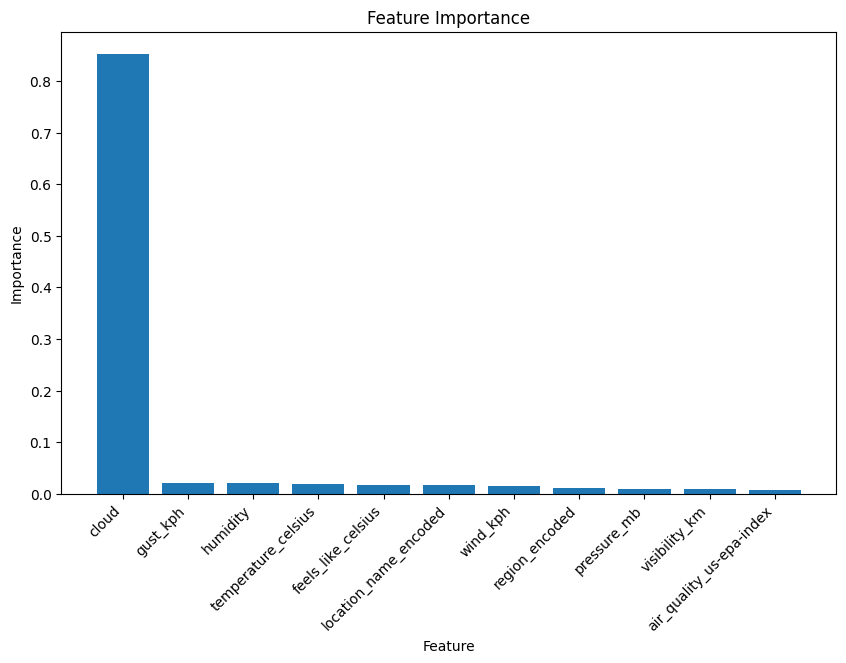

In [ ]:
# Mendapatkan feature importance
feature_importance = dt.feature_importances_

# Mendapatkan nama fitur
feature_names = x_train.columns

# Menggabungkan nama fitur dan feature importance dalam satu DataFrame untuk memudahkan analisis
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})

# Menyortir DataFrame berdasarkan feature importance secara menurun
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Mencetak atau memvisualisasikan feature importance
print(feature_importance_df)

# Plot bar chart untuk feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

                     Feature  Importance
4                      cloud      0.6101
3                   humidity      0.1457
6              visibility_km      0.0566
8   air_quality_us-epa-index      0.0330
5         feels_like_celsius      0.0308
2                pressure_mb      0.0293
0        temperature_celsius      0.0242
7                   gust_kph      0.0222
1                   wind_kph      0.0176
9      location_name_encoded      0.0175
10            region_encoded      0.0130


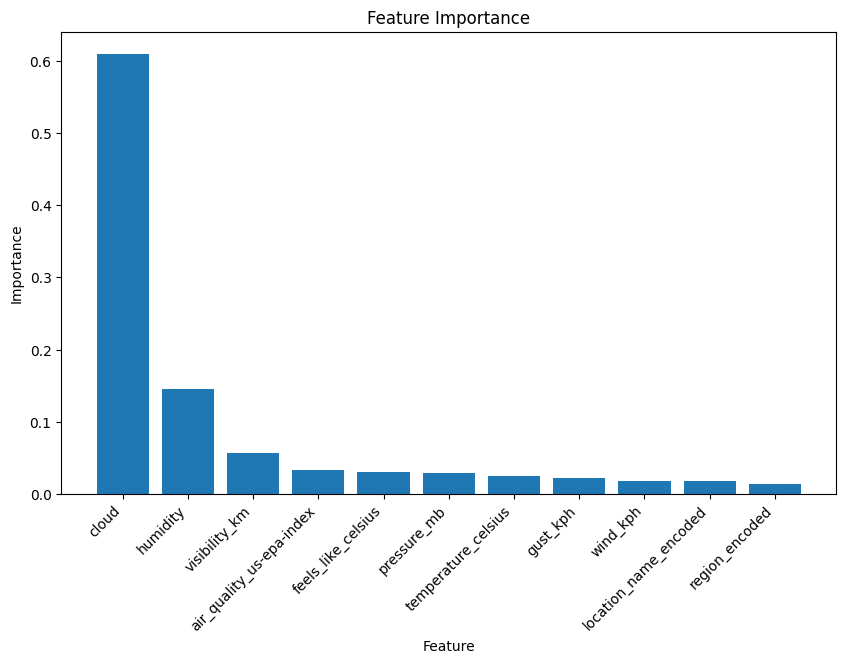

In [ ]:
# Mendapatkan feature importance
feature_importance = rf.feature_importances_

# Mendapatkan nama fitur
feature_names = x_train.columns

# Menggabungkan nama fitur dan feature importance dalam satu DataFrame untuk memudahkan analisis
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})

# Menyortir DataFrame berdasarkan feature importance secara menurun
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Mencetak atau memvisualisasikan feature importance
print(feature_importance_df)

# Plot bar chart untuk feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()